# Las matematicas tras la regresion logistica

**Las tablas de contingencia**

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("curso_complementario/datasets/gender-purchase/Gender Purchase.csv")
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [3]:
df.shape

(511, 2)

In [5]:
contingency_table = pd.crosstab(df["Gender"], df["Purchase"])
contingency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [13]:
# suma horizontal
contingency_table.sum(axis=1)

Gender
Female    265
Male      246
dtype: int64

In [14]:
# suma vertical
contingency_table.sum(axis=0)

Purchase
No     231
Yes    280
dtype: int64

In [16]:
contingency_table.astype("float").div(contingency_table.sum(axis=1), axis=0) 

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


## Laprobabilidad condicional

* Cual es la probabilidad de que un cliente compre un producto si es un hombr
* Cual es la probabilidad de que un cliente compre un producto sea mujer

In [19]:
from IPython.display import display, Math, Latex

In [24]:
display(Math(r'P(Purchase|Male) = \frac{Numero\ total\ de\ compras\ hechas\ por\ hombres}{Numero\ total\ de\ hombres\ del\ grupo} = \frac{Purchase\cap Male}{Male} '))

<IPython.core.display.Math object>

In [25]:
121/246

0.491869918699187

<!-- P(purchase|male)
0.49
P(no purchase|male)
0.508
P(purchase|female)
0.6
P(no purchase|male)
0.4 -->


 * P(Purchase|male)
0.49
 * P(noPurchase|male)
0.51
 * P(Purchase|female)
0.6
 * P(noPurchase|female)
0.4

### Ratio de probabilidades
cociente entre los casos de exito sobre los de fracaso en el suceso estudiado para cada grupo
pm = probabilidad de compras hechas por hombres
pf = probabilidad de compras hechas por mujeres
* odds purchase_male = Pm/1-pm
* odds purchase_female = pf/ 1-pf

In [30]:
pm = 121/246
pf = 159/265
odds_m = pm/(1-pm)
odds_f = pf/(1-pf)

## cuanto menor este cociente, mayor es la probabilidad de fallo
#si el ratio es mayor a 1, es mas probable el exito que el fracaso
# si el ratio es igual a 1 el exito y el fracaso tienen equiprobabilidad


In [28]:
odds_m, odds_f

(0.9680000000000002, 1.4999999999999998)

In [32]:
oddfs_r=odds_m / odds_f
oddfs_r

0.6453333333333335

ln(p/(1-p) = a + b*x

p= e^(a+b*x)/(1+e^(a+b*x)

p=1/(1+e^-(a + b*x))
* si a + bx es muy peque;o(negativo), entonces  p tiende a 0
* si a + bx es muy grande, p tiende a 1

* si a + bx = 0, p = 0.5

### Regresion logistica multiple

p = 1/(1+e^-(a+Sbi*xi))

## Implementacion del metodo de la maxima verosimilitud para la regresion logistica

### Definir la funcion L(a,b)= L(b)

In [34]:
from IPython.display import display, Math, Latex
display(Math(r"L(\beta)=\sum_{i-1}^n P_i^{y_i}(1-p_i)^{y_i}"))

<IPython.core.display.Math object>

In [83]:

def likelihood(y, pi):
    import numpy as np
    total_sum = 1
    sum_in = list(range(1, len(y)+1))
    for i in range (len(y)):
        sum_in[i]= np.where(y[i]==1, pi[i], 1-pi[i])
        total_sum = total_sum * sum_in[i]
    return total_sum
    


### Calculas las probabilidades para cada observacion


In [41]:
display(Math(r" Pi = P(x_i) = \frac{1}{1 + e^{-\sum_{j=0}^k\beta_j\cdot x_ij}}"))

<IPython.core.display.Math object>

In [77]:
def logitprobs(x, beta):
    import numpy as np
    n_rows = np.shape(x)[0]
    n_cols = np.shape(x)[1]
    pi=list(range(1, n_rows + 1))
    expon = list(range(1, n_rows + 1))
    
    for i in range(n_rows):
        expon[i] = 0
        for j in range(n_cols):
            ex = x[i][j] * beta[j]
            expon[i] = ex + expon[i]
        with np.errstate(divide = "ignore", invalid = "ignore"):
            pi[i] = 1 / (1 + np.exp(-expon[i]))
    return pi
        

        
    

### Calcular la matriz diagonal 

In [45]:
 display(Math(r"w = diagonal(P_i \cdot (1-P_i))_{i=1}^n)"))

<IPython.core.display.Math object>

In [67]:
def findW(pi):
    import numpy as np
    n = len(pi)
    w = np.zeros((n,n))
    for i in range(n):
        print(i)
        w[i,i] = pi[i]*(1-pi[i])
        w[i,i].astype(float)
    return w
    

### Obtener la solucion de la funcion logistica Newton Rapson

In [50]:
display(Math(r"beta_{n+1} = beta_n -\frac{f(beta_n)}{f'(beta_n)}"))
display(Math(r"f(x)= X*(Y-P)"))
display(Math(r"f'(x) = XWX^T"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [106]:
def logistics(x, y, limit):
    import numpy as np
    # linalg para hacer matrices inversas
    from numpy import linalg
    n_row = np.shape(x)[0]
    bias = np.ones(n_row).reshape(n_row,1)
    x_new = np.append(x, bias, axis = 1)
    n_col = np.shape(x_new)[1]
    beta = np.zeros((n_col,1))
    
    # diferencias entre las b
    root_dif = np.array(range(1, n_col + 1)).reshape(n_col, 1)
    iter_i = 10000
    while (iter_i > limit):
    # el limite en este caso no es el numero de iteraciones
    # sino el limite del cambio de un paso al siguiente, las diferencias al cuadrado
        print("Iter: i"+str(iter_i) + "," + "limit:"+ str(limit))
        pi = logitprobs(x_new, beta)
        print("pi:" +str(pi))
        w =findW(pi)
        print("w:"+ str(w))
        numerador = (np.transpose(np.matrix(x_new))*np.matrix(y-np.transpose(pi)).transpose())
        
        denominador = (np.matrix(np.transpose(x_new))*np.matrix(w)*np.matrix(x_new))
        root_dif = np.array(linalg.inv(denominador)*numerador)
        
        beta = beta + root_dif
        print("beta:"+str(beta))
        
        # distancia entre un paso y el siguiente
        iter_i = np.sum(root_dif * root_dif)
       
        LI = likelihood(y, pi)
    return beta
    
        
    

## Comprobacion experimental

In [55]:
import numpy as np

In [56]:
x = np.array(range(10)).reshape(10,1)

In [57]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [58]:
y = [0,0,0,0,1,0,1,0,1,1]

In [59]:
bias = np.ones((10,1))
x_new = np.append(x,bias,axis=1)

In [60]:
x_new

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

In [107]:
# prueba de la funcion logistics
a = logistics(x,y, 0.00001)

Iter: i10000,limit:1e-05
pi:[array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5]), array([0.5])]
0
1
2
3
4
5
6
7
8
9
w:[[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
beta:[[ 0.43636364]
 [-2.36363636]]
Iter: i5.777190082644626,limit:1e-05
pi:[array([0.08598797]), array([0.12705276]), array([0.18378532]), array([0.2583532]), array([0.35019508]), array([0.45467026]), array([0.56329497]), array([0.66616913]), array([0.75533524]), array([0.8268

In [92]:
ll = likelihood(y, logitprobs(x,a))

In [93]:
ll

array([1.32622426e-06])

In [94]:
# en este caso el ultimo coeficiente de beta, es la ordenada en el origen

 nuestro modelo queda, este es el exponente de nuestra funcion logistica 
    y = 0.6622087* x - 3.69557172


# con el paquete stats de python

In [98]:
import statsmodels.api as sm

In [99]:
logit_model = sm.Logit(y,x_new)

In [101]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.431012
         Iterations 6


In [103]:
print(result.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.360   
Dependent Variable: y                AIC:              12.6202 
Date:               2021-03-05 08:07 BIC:              13.2254 
No. Observations:   10               Log-Likelihood:   -4.3101 
Df Model:           1                LL-Null:          -6.7301 
Df Residuals:       8                LLR p-value:      0.027807
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
x1        0.6622     0.4001    1.6551   0.0979   -0.1220   1.4464
const    -3.6956     2.2889   -1.6145   0.1064   -8.1818   0.7906



## Regresion logistica para predicciones bancarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("curso_complementario/datasets/bank/bank.csv", sep=";")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
data.shape

(4119, 21)

In [5]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [6]:
# transformo los si en 1 y los no en 0
data["y"] = (data["y"]=="yes").astype(int)


In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [8]:
# para ver los elementos unicos
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [171]:
# agrupamos los niveles de educacion para evitar tener tantas categorias

In [9]:
data["education"]=np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"]=np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"]=np.where(data["education"]=="basic.9y", "Basic", data["education"])


data["education"]=np.where(data["education"]=="high.school", "High School", data["education"])
data["education"]=np.where(data["education"]=="professional.course", "Professional Course", data["education"])

data["education"]=np.where(data["education"]=="university.degree", "Universitiy Degree ", data["education"])

data["education"]=np.where(data["education"]=="illiterate", "Illiterate", data["education"])


data["education"]=np.where(data["education"]=="unknown", "Unknown", data["education"])





In [10]:
data["education"].unique()

array(['Basic', 'High School', 'Universitiy Degree ',
       'Professional Course', 'Unknown', 'Illiterate'], dtype=object)

In [11]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [12]:
# con esto puedo ver todas las colunmas numericas
data.groupby("y").mean()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
Universitiy Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compradel producto')

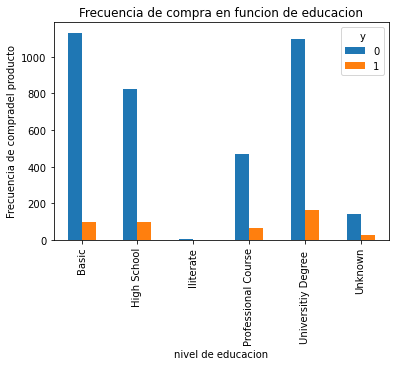

In [139]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion de educacion")
plt.xlabel("nivel de educacion")
plt.ylabel("Frecuencia de compradel producto")


Text(0, 0.5, 'Proporcion de clientes')

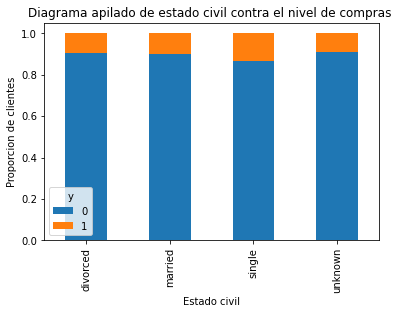

In [140]:
table= pd.crosstab (data.marital, data.y)
# hacemos una divicion para  tener una idea mas clara, y para que todo quede escaldo entre 0 y uno
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras ")
plt.xlabel("Estado civil")
plt.ylabel("Proporcion de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

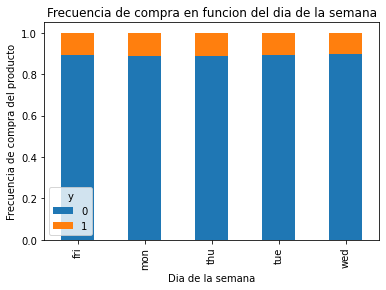

In [143]:
%matplotlib inline
table =pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

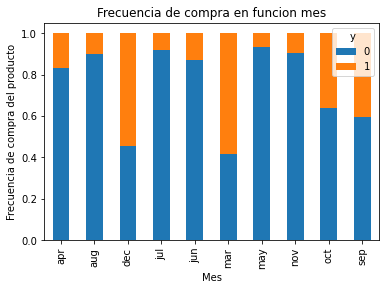

In [144]:
%matplotlib inline
table =pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en funcion mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

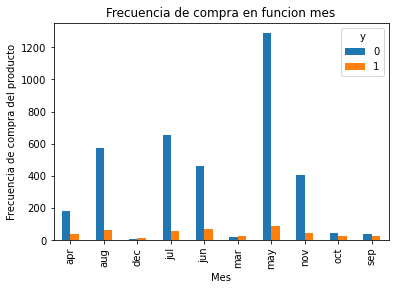

In [145]:
%matplotlib inline
table.plot(kind="bar")
plt.title("Frecuencia de compra en funcion mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Cliente')

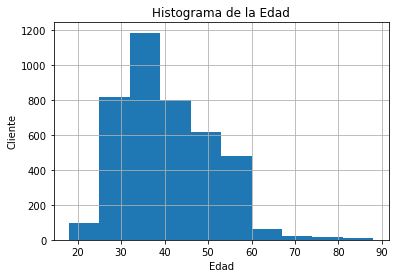

In [146]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")



<AxesSubplot:xlabel='age'>

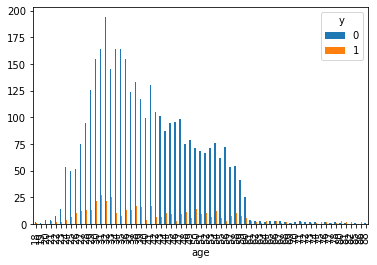

In [148]:
pd.crosstab(data.age, data.y).plot(kind="bar")

<AxesSubplot:xlabel='poutcome'>

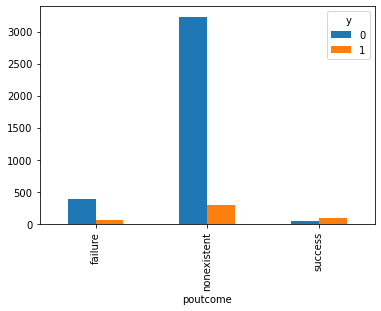

In [149]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

### Conversion de variables categoricas a dummies

In [14]:

categories = ["job", "marital", "education", "housing", "loan", "contact", 
              "month", "day_of_week", "poutcome"]
for category in categories:
    cat_list = "cat"+ "_"+category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [15]:

data_vars = data.columns.values.tolist()


In [16]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]]

In [17]:
# hacemos un subconjunto de nuestra data original

bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_Universitiy Degree ', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       

In [59]:
bank_data_vars = bank_data.columns.values.tolist()
Y =bank_data["y"]
X = bank_data.drop("y", axis=1)
#X.dtypes

x_array = X.to_numpy()

y_array = Y.to_numpy().reshape(-1,1)
y_array.shape


(4119, 1)

### Seleccion de rasgos para el modelo

In [21]:
 n = 12

In [20]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [22]:
lr = LogisticRegression()

In [27]:
 bank_data.columns.values
    

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_Universitiy Degree ', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       

In [147]:
# usamos el metodo RFE para que nos diga que variables usar
# con el podemos eliminar variables, le pasamos el tipo de modelo que usaremos, y el numero de incognitas que deseamos
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(X, Y)

# deberia funcionar si uso python 3.8

AttributeError: 'str' object has no attribute 'decode'

In [39]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"]

In [40]:
Xfinal = bank_data[cols]
yfinal = bank_data["y"]

### Implementacion del modelo en Python con statsmodel.api

In [42]:
import statsmodels.api as sm

In [44]:
logit_model = sm.Logit(yfinal, Xfinal)

In [45]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [46]:
# usamos el paquete de stats para observar los pvalores
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2021-03-06 11:32  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### Implementacion del model en Python con scikit-learn

In [47]:
from sklearn import linear_model

In [48]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(Xfinal,yfinal)

LogisticRegression()

In [49]:
logit_model.score(Xfinal,yfinal)

0.8958485069191552

In [51]:
yfinal.mean()

0.10949259529011895

In [52]:
pd.DataFrame(list(zip(Xfinal.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.536254117938186]
1,euribor3m,[-0.5443670397997274]
2,job_blue-collar,[-0.35331387435009665]
3,job_retired,[0.3616515908110014]
4,month_aug,[0.6292588895077428]
5,month_dec,[1.1943974572122065]
6,month_jul,[0.9630554140671378]
7,month_jun,[1.0566897056472648]
8,month_mar,[1.638668023459505]
9,month_nov,[0.45770841910622234]


## Validacion del modelo logistico

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size = 0.3, random_state=0)

In [67]:
lm = linear_model.LogisticRegression()
lm.fit(x_train, y_train)

LogisticRegression()

In [73]:
from IPython.display import display, Math, Latex

In [86]:
display(Math(r"y_p=\begin{cases}0& si\ p\leq0.5\\1& si\ p>0.5\end{cases}"))

<IPython.core.display.Math object>

In [69]:
# mi modelo consigue probabilidades
probs = lm.predict_proba(x_test)

In [70]:
probs
# en funcion de umbral estas probabildades se convierten la clasificacion
# por default el threshold es 0.5

# la que calculamos es la segunda columna(1)

array([[0.95409621, 0.04590379],
       [0.83896646, 0.16103354],
       [0.93216535, 0.06783465],
       ...,
       [0.65098445, 0.34901555],
       [0.97381005, 0.02618995],
       [0.57635748, 0.42364252]])

In [71]:
prediction = lm.predict(x_test)

In [72]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
display(Math(r"\varepsilon\in (0,1), y_p=\begin{cases}0& si\ p\leq \varepsilon\\1& si\ p>\varepsilon\end{cases}"))

<IPython.core.display.Math object>

In [88]:
prob = probs[:,1]
prob

array([0.04590379, 0.16103354, 0.06783465, ..., 0.34901555, 0.02618995,
       0.42364252])

In [90]:
# podemos probar con varios threshold
prob_df= pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)

prob_df.head()

,0,prediction
0,0.045904,0
1,0.161034,1
2,0.067835,0
3,0.062222,0
4,0.042308,0


In [91]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [92]:
390/len(prob_df)*100

31.55339805825243

In [93]:
threshold = 0.15
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,915
1,321


In [94]:
331/len(prob_df)*100


26.779935275080906

In [95]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [96]:
732/len(prob_df)* 100

59.22330097087378

In [97]:
from sklearn import metrics

In [98]:
metrics.accuracy_score(y_test, prediction)

0.901294498381877

## Validacion cruzada

In [99]:
from sklearn.model_selection import cross_val_score

In [101]:
scores = cross_val_score(linear_model.LogisticRegression(),Xfinal, yfinal, scoring="accuracy",cv =10)

In [102]:
scores

array([0.90533981, 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89320388, 0.88807786])

In [103]:
scores.mean()

0.8943903101599225

## Matrices de Confusion y curvas ROC

In [105]:
x_train, x_test, y_train, y_test = train_test_split(Xfinal, yfinal, test_size= 0.3, random_state=0)

In [107]:
lm = linear_model.LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression()

In [109]:
probs = lm.predict_proba(x_test)

In [112]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
# transformamos y_test en lista para que pierda los indices pasados, y_test es un subcojunto de datos
prob_df["actual"] = list(y_test)
prob_df

,0,prediction,actual
0,0.045904,0,0
1,0.161034,1,0
2,0.067835,0,0
3,0.062222,0,0
4,0.042308,0,0
...,...,...,...
1231,0.062222,0,0
1232,0.062157,0,0
1233,0.349016,1,0
1234,0.026190,0,0


In [129]:
confusion_matrix = pd.crosstab(prob_df.actual, prob_df.prediction)

In [130]:
confusion_matrix

prediction,0,1
actual,,
0,1034,80
1,73,49


In [117]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1] 

FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0] 



In [118]:
sens = TP/(TP+FN)
sens

0.21025641025641026

In [119]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.047281323877068515

In [135]:
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25, 0.3, 0.4, 0.5]
sensitivities = [1]
especifities_1 = [1]
for t in thresholds:
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    # transformamos y_test en lista para que pierda los indices pasados, y_test es un subcojunto de datos
    prob_df["actual"] = list(y_test)
    prob_df.head()
    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1] 

    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0] 
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espc_1 = 1-TN/(TN+FP)
    especifities_1.append(espc_1)
sensitivities.append(0)
especifities_1.append(0)


In [128]:
sensitivities

[0.11597151576805696,
 0.1407103825136612,
 0.19951923076923078,
 0.21025641025641026,
 0.22816901408450704,
 0.2367601246105919,
 0.31343283582089554,
 0.36423841059602646,
 0.3798449612403101]

In [122]:
especifities_1

[0.031620553359683834,
 0.037698412698412676,
 0.04756097560975614,
 0.047281323877068515,
 0.04653802497162318,
 0.050273224043715814,
 0.05700483091787445,
 0.06175115207373272,
 0.06594399277326102]

In [123]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

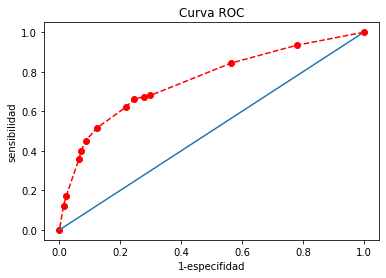

In [136]:
%matplotlib inline
plt.plot(especifities_1,sensitivities, marker="o",linestyle="--", color="r")
x=[i*0.01 for i in range(100)]
y=[i*0.01 for i in range(100)]
plt.plot(x, y)
plt.xlabel("1-especifidad")
plt.ylabel("sensibilidad")
plt.title("Curva ROC")


# cuando el threshold incrementa, tanto la sensibilidad como la especifidad decresen, es decir que la sensibilidad es maxima cuando el threshold e 0

In [138]:
from sklearn import metrics
from ggplot import *

AttributeError: module 'pandas' has no attribute 'tslib'

In [139]:
prob

array([0.04590379, 0.16103354, 0.06783465, ..., 0.34901555, 0.02618995,
       0.42364252])

In [140]:
espc_1, sensit, _ = metrics.roc_curve(y_test,prob)

In [141]:
sensit

array([0.        , 0.00819672, 0.02459016, 0.03278689, 0.03278689,
       0.04918033, 0.04918033, 0.05737705, 0.05737705, 0.07377049,
       0.07377049, 0.08196721, 0.08196721, 0.08196721, 0.09836066,
       0.09836066, 0.12295082, 0.12295082, 0.13114754, 0.13114754,
       0.13934426, 0.13934426, 0.16393443, 0.16393443, 0.17213115,
       0.17213115, 0.18852459, 0.18852459, 0.19672131, 0.19672131,
       0.19672131, 0.19672131, 0.19672131, 0.19672131, 0.21311475,
       0.21311475, 0.23770492, 0.23770492, 0.24590164, 0.27868852,
       0.28688525, 0.28688525, 0.28688525, 0.31147541, 0.31147541,
       0.31967213, 0.31967213, 0.32786885, 0.32786885, 0.3442623 ,
       0.3442623 , 0.3442623 , 0.3442623 , 0.3442623 , 0.35245902,
       0.35245902, 0.36065574, 0.36065574, 0.36885246, 0.36885246,
       0.37704918, 0.37704918, 0.40163934, 0.40163934, 0.41803279,
       0.41803279, 0.45081967, 0.45081967, 0.45081967, 0.45901639,
       0.45901639, 0.45901639, 0.45901639, 0.46721311, 0.46721

In [142]:
df = pd.DataFrame({
    "x":espc_1,
    "y":sensit
})

In [143]:
df.head()

,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.024590
3,0.000000,0.032787
4,0.002693,0.032787


In [146]:
auc =metrics.auc(espc_1,sensit)
auc

0.7579171204049798